## The following project is an attempt to extract some specific fields from the invoice receipt images and display them.
The fields which are extracted are:
* Total Amount
* Taxes
* Authorization Code
* Reference code
* Date of receipt generation  

*Right now around 3 fields on an average are identified correctly among the five fields and I am working towards improving the accuracy for the same.*

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,212 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
! apt install libtesseract-dev
! pip install Pillow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 11 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Fetched 2,755 kB in 1s (3,254 kB/s)
Selecting previously unselected package libleptonica-dev.
(Reading database ... 144675 files and directories currently installed.)
Preparing to unpack .../libleptonica-dev_1.75.3-3_amd64.deb ...
Unpacking libleptonica-dev (1.75.3-3) ...
Selecting previously unselected package libtesseract-dev.
Preparing to unpack .../libte

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=a6c6527233add37ef3ea3b620bc71626aa6590a988f4c0b7839d55509dbd28be
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [ ]:
from skimage import data
from skimage import filters
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pytesseract

## Function to recognize text from image
### def ocr_process(image_name,page_seg_method='3'):

* This function first reads the image using opencv imread function.The image is the converted to grayscale.
*   Further image is converted to binary image using adaptive thresholding method, and the gaussian filter is used to remove all the noise.
*   After the image is preprocessed to, tesseract library is used over the image to extract all the text from the receipt.
*   This text is returned by the function in the form of string variable 'txt'.

In [ ]:
#Function to recognize text from image

def ocr_process(image_name,page_seg_method='3'):
  image = cv2.imread(image_name)
  im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #plt.figure(figsize = (15,15))
  #plt.imshow(im_gray, cmap='gray')

  im_inv = cv2.adaptiveThreshold(im_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,20)
  #plt.figure(figsize = (15,15))
  #plt.imshow(im_inv, cmap='gray')

  kernel = 1/16*np.array([[1,2,1],[2,4,2],[1,2,1]])
  im_blur = cv2.filter2D(im_inv, -1, kernel)
  plt.figure(figsize = (15,15))
  plt.imshow(im_blur, cmap='gray')

  #_, thresh = cv2.threshold(im_gray, 0 , 255 ,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  #plt.figure(figsize = (15,15))
  #plt.imshow(im_blur, cmap='gray')
  pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')
  txt = str(pytesseract.image_to_string(im_blur, lang="eng",config= '--psm3'))
  return txt

In [ ]:
import regex
import difflib


In [ ]:
!pip install fuzzywuzzy
!pip install python-levenshtein

     |████████████████████████████████| 51kB 4.9MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144795 sha256=b0d7abd4754519a5faf6fe6e16006912478373ce09429c206c2625e1e7639e27
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-levenshtein


In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## Function to extract amount from text
### def extract_amount(text): 


*   This function is used to extract the total final amount of the receipt.
*   A 'for loop' is used that iterates line by line by line over the extracted text ('txt').
* For each line the line is compared with predefined substrings like "amount", "total", etc., which might be an indicator of the total amount. The occurence is indicated if the value of partial ratio is above a certain threshold.
*   The concept of levenshtein distance is used for comparing the substrings using partial ratios of fuzzywuzzy library.
* When the occurence is found, regular expressions are used to find the exact position of the word in the sentence and all the numerical characters following that word are extracted as the final amount. 



In [ ]:
# Function to extract amount from text

def extract_amount(text): 
  for sentence in text.split('\n'):
    s = sentence.replace(" ", "")
    s =s.lower()
  
    if((fuzz.partial_ratio(s,'total')>=80 or fuzz.partial_ratio(s,'amount')>=80 or fuzz.partial_ratio(s,'interac chequing')>=80) and not fuzz.partial_ratio(s,'savings')>=80 and not fuzz.partial_ratio(s,'subtotal')>=70  and not fuzz.partial_ratio(s,'tax')>=80):
    
      if(fuzz.partial_ratio(s,'total')>=80):
        substr = 'total'
      elif(fuzz.partial_ratio(s,'amount')>=80 ):
        substr = 'amount'
      else:
        substr = 'interac chequing'
    
      sequence_matcher = difflib.SequenceMatcher(None,s,substr)
      match = sequence_matcher.find_longest_match(0, len(s), 0, len(substr))
    
      temp_price = regex.compile(r'\d*\.?\d+')
    
      try:
        temp1_price = temp_price.search(s, pos=match.a+1, endpos=len(s)) 
        return temp1_price.group()
        break
      except:
        temp1 = None
    

## Function to extract tax from text

### def extract_tax(text): 


*   This function is used to extract the total final tax amount of the receipt.
*   Similar concept as used in the module of extract_amount, is used. 
*   The difference is in the predefined substrings whose occurence we have to find while traversing the whole text. 
*   Here the predefined substrings are, 'gst','hst','qst','tax' etc.



In [ ]:
# Function to extract tax from text

def extract_tax(text):
  for sentence in text.split('\n'):
    s = sentence.replace(" ", "")
    s = s.lower()
  
    if(fuzz.partial_ratio(s,'gst')==100 or fuzz.partial_ratio(s,'hst')==100 or fuzz.partial_ratio(s,'qst')==100 or fuzz.partial_ratio(s,'tax')==100 or fuzz.partial_ratio(s,'taxes')==100 or fuzz.partial_ratio(s,'tps')==100 or fuzz.partial_ratio(s,'pst')==100):
    
      if(fuzz.partial_ratio(s,'gst')==100):
        substr = 'gst'
      
      if(fuzz.partial_ratio(s,'qst')==100):
        substr = 'qst'
      
      if(fuzz.partial_ratio(s,'hst')==100):
        substr = 'hst'

      if(fuzz.partial_ratio(s,'pst')==100):
        substr = 'pst'
      
      if(fuzz.partial_ratio(s,'tps')==100):
        substr = 'tps'
      
      if(fuzz.partial_ratio(s,'tax')==100):
        substr = 'tax'
      
      if(fuzz.partial_ratio(s,'taxes')==100):
        substr = 'taxes'
    
      sequence_matcher = difflib.SequenceMatcher(None,s,substr)
      match = sequence_matcher.find_longest_match(0, len(s), 0, len(substr))
      
      if(s.rfind('%')!=-1):
        pos_final=max(match.a+1,s.rfind('%'))
      else:
        pos_final=match.a+1
        
      temp_tax = regex.compile(r'\d*\.?\d+')
    
      try:
        temp1_tax = temp_tax.search(s, pos=pos_final, endpos=len(s)) 
        return (substr,temp1_tax.group())     
        break
      except:
        temp1 = None
    

In [ ]:
import os

## Function to extract authorization code from text
### def extract_auth(text): 

*   This function is used to extract the total final tax amount of the receipt.
*   Similar concept as used in extract_tax module is used.  



In [ ]:
# Function to extract authorization code from text

def extract_auth(text):
  for sentence in text.split('\n'):
    s = sentence.replace(" ", "")
    s = s.lower()
    #print(s)
    if(fuzz.partial_ratio(s,'auth')>=75):
      
      substr = 'auth'

      sequence_matcher = difflib.SequenceMatcher(None,s,substr)
      match = sequence_matcher.find_longest_match(0, len(s), 0, len(substr))
      
      if(s.rfind('#')!=-1):
        pos_final=max(match.a+1,s.rfind('#'))
      else:
        pos_final=match.a+1
        
      temp_auth = regex.compile(r'\d*$')
    
      try:
        temp1_auth = temp_auth.search(s, pos=pos_final, endpos=len(s)) 
        return  temp1_auth.group() 
        break
      except:
        temp1 = None
    

In [ ]:
# Function to extract Reference code from text

def extract_ref(text):
  for sentence in text.split('\n'):
    s = sentence.replace(" ", "")
    s = s.lower()
    #print(s)
    if(fuzz.partial_ratio(s,'ref')==100):
      
      substr = 'ref'

      sequence_matcher = difflib.SequenceMatcher(None,s,substr)
      match = sequence_matcher.find_longest_match(0, len(s), 0, len(substr))
      
      if(s.rfind('#')!=-1):
        pos_final=max(match.a+1,s.rfind('#'))
      else:
        pos_final=match.a+1
        
      temp_ref = regex.compile(r'\d*$')
    
      try:
        temp1_ref = temp_ref.search(s, pos=pos_final, endpos=len(s)) 
        return  temp1_ref.group() 
        break
      except:
        temp1_ref = None
    

In [ ]:
!pip install dateparser
import dateparser
from dateparser import search
from dateparser import parse

     |████████████████████████████████| 286kB 9.5MB/s 


## Function to extract date from text
###def extract_date(content):
* dateparser library is used to find the date from the text.
* This function returns a list of possible dates. All these dates are checked with the proper format. If a particular date is in the proper format, then it's extracted as the final date of the receipt.

In [ ]:
# Function to extract date from text

def extract_date(content):
  temp = dateparser.search.search_dates(content, languages=None, settings=None, add_detected_language=False)
  for l in temp:
    if(l[0].find('/')==-1 and l[0].find('-')==-1):
      continue
    else:
      return(l[0])
      break

# Function to display all the details of invoice
###def show_details(content):
* This function calls all the five functions to extract various fields one by one and displays the final output.
* In case the details of  a particular field are not found in the receipt or the programme is not able to detect the values, it outputs "not applicable". 

In [ ]:
# Function to display all the details of invoice

def show_details(content):
  content = os.linesep.join([s for s in content.splitlines() if s])

  price = extract_amount(content)
  if(not price):
    print("price not found")
  else: 
    print("Total Amount: ",price)

  tax = extract_tax(content)
  if(not tax):
    print("Taxes not applicable")
  else: 
    print("Taxes: ",tax)
 
  auth_code = extract_auth(content)
  if(not auth_code):
    print("Authorization code not applicable")
  else: 
    print("Authorization code: ",auth_code)

  #Reference number (if applicable) 
  ref_code = extract_ref(content)
  if(not ref_code):
    print("Reference code not applicable")
  else: 
    print("Reference code: ",ref_code)

  date = extract_date(content)
  if(not date):
    print("date not applicable")
  else: 
    print("Date(time optional): ",date)


##Display the content of invoice
* It requires the image of the path to be entered as input.
* It then processes the image to extract all the details.

Enter the path of the invoice that you want to use: /content/drive/My Drive/bills/4.jpg
STRUCTUBE

28 Heritage Gate SE
Calgary, AB T2H 3A7
(493) 7710-1988 a

ere eee soooeareo 1000041 141
‘Reel 183 Trans: 4UIA2
| 5 rson: 3225 0
sales i Sentenber “2000
gat £09562
aging Pugl —
COPY ©.
: wanes Amount
pescr Ipt ion Cc eeeeenenen tte
er — 1
qrem No. g7.18.43.9
Jable “Jerry” Walnut ;
cof Fee 179.00/un 179,00
Subtotal § 179,00
| TPS/GST 8.95
} Total $ 187.95
3 Card 187.95
- Mastercard
0678 _
| Date 20-09-15 5:35
|e MASTERCARD
d Type
card tuber pepe ERE PRR 0678
+ pURCHASE
1 Frount 07.85

NO SIGNATURE. TRANSACTION

’
i Terminal No. j wonton
\ Trans. no. : pasty
auth Code , ; ‘
Ref Num 66270640010260180 I!
Label HAS FERCARD
| top abe on
\ Tur aROC 900000800()
2 ov APPROVED ~ yank YOU 027
FF / OT 00

Cardholder wil) pay card issuer
| above amount pursuant to
Cardholder Agreemen:,

IMPORTANT
Retain this copy fur ywur recoils

CUSTOMER COPY
GST 1080a/3b9 Ripoal
re inforeal fon OF detalls on
return

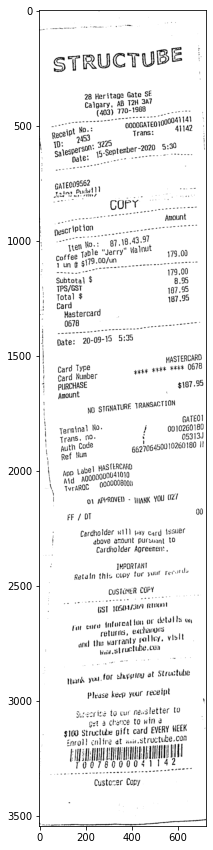

In [ ]:
#Function to display the content of invoice
#Suppose the path of invoice is '/content/drive/My Drive/bills/4.jpg'

img_path = input("Enter the path of the invoice that you want to use: ")
content = ocr_process(img_path,'3')
print(content)

In [ ]:
#Function to show the extracted information
show_details(content)

Total Amount:  187.95
Taxes:  ('tps', '8.95')
Authorization code not applicable
Reference code not applicable
Date(time optional):  20-09-15 5:35
